<a href="https://colab.research.google.com/github/dancankimutai/Logistic-regression-email-spam-classifier/blob/main/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
#  import necessary libraries,mount Google Drive and read in email data from a CSV file
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data=pd.read_csv('/content/drive/My Drive/csvfile/emails.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
data.head


<bound method NDFrame.head of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastru

In [77]:
# extract the values from the DataFrame using the DataFrame.iloc method

# the : symbol indicates that all rows should be selected
# the 1:-1 part specifies that only the columns with indices 1/2nd column to the second-last column should be selected
X = data.iloc[:, 1:-1].values
# select the last column in the DataFrame and assign it to the variable y
y = data.iloc[:, -1].values


In [78]:
# split the data into training and test sets(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


In [79]:
# train a logistic regression model on the training data
lmodel = LogisticRegression(solver='liblinear')
lmodel.fit(X_train,y_train)


LogisticRegression(solver='liblinear')

In [80]:
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve


In [81]:
#function that evaluates the performance of a logistic regression model
def report(model):
  # Generate predictions on the test set using the model
    preds = model.predict(X_test)
    # Print a classification report
    print(classification_report(preds,y_test))
    # Plot a confusion matrix
    plot_confusion_matrix(model,X_test,y_test)
    # Plot a precision-recall curve
    plot_precision_recall_curve(model,X_test,y_test)
    #plots a ROC curve, which shows the relationship between the true positive rate and the false positive rate for different threshold values
    plot_roc_curve(model,X_test,y_test)


LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1099
           1       0.96      0.94      0.95       453

    accuracy                           0.97      1552
   macro avg       0.97      0.96      0.96      1552
weighted avg       0.97      0.97      0.97      1552



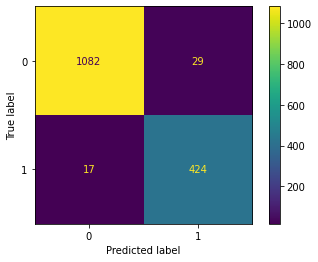

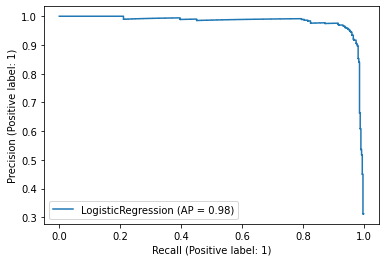

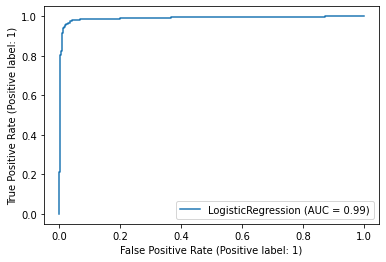

In [82]:
print("LOGISTIC REGRESSION MODEL")
report(lmodel)